In [65]:
reload_toocan = False # part of code that takes long time

<span style="color:pink">## choose subregion</span>

In [66]:
lon_min_subregion = 130
lon_max_subregion = 165
lat_min_subregion = 0
lat_max_subregion = 20

<span style="color:pink">## choose attribute (listed in code below in toocan[0])</span>

In [67]:
attribute = "dist"

<span style="color:pink">## choose MCS index and attribute (when plotting a single MCS, which MCS do you want to look at? Which attribute?). attributes listed in code blow in under toocan[36].clusters</span>

In [68]:
MCS_idx = 0
attribute_single_MCS = "surfkm2_132Wm2"

<span style="color:pink">## choose single timestep index for prec</span>

In [69]:
prec_idx = 5

<span style="color:pink">## choose extreme percentile</span>

In [70]:
percentile = 99.999

<span style="color:pink">##</span>

# Imports

In [71]:
%reload_ext autoreload
%matplotlib inline

In [72]:
%autoreload 2

import sys,os,glob
import psutil

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from pprint import pprint
import datetime as dt


from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs

import datetime as dt
import re
import gc
import matplotlib.animation as animation
import warnings
import pickle
from scipy.interpolate import interp1d


#-- Own settings

sys.path.append('/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/scripts/start')


from my_functions import *
from load_TOOCAN_DYAMOND_modif_BF import load_TOOCAN_DYAMOND

# Paths

In [73]:
# path = '/home/gmaxemin/windows/internship_g_maxemin/DYAMOND_REGIONS'
toocan_path = "/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking"
# filename = 'TOOCAN-GLOBAL-20160801-20160831.dat.gz'
toocan_filename = 'TOOCAN-GLOBAL-20160801-20160831.dat.gz'

In [74]:
#-- Paths

# DIR_DYAMOND (where DYAMOND data are)

path_DYAMOND_REGIONS = '/data/bfildier/DYAMOND_REGIONS/'
path_reg1_SAM = os.path.join(path_DYAMOND_REGIONS, "130E_165E_0N_20N/SAM")
path_2D = os.path.join(path_reg1_SAM,'2D')

DIR_DYAMOND = path_2D
print(DIR_DYAMOND)

# DIR_DATA (where segmentation relation table is)

DIR_DATA = "/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/input/"

/data/bfildier/DYAMOND_REGIONS/130E_165E_0N_20N/SAM/2D


In [75]:
# Load relation table DYAMOND-TOOCAN
filename_table = 'relation_2_table_UTC_dyamond_segmentation.csv'
# load
df = pd.read_csv(os.path.join('/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/scripts',filename_table))
# sort
df.sort_values(by='UTC',ignore_index=True,inplace=True)
# show
df

,Unnamed: 0,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,img_seg_path,str_code,Unnamed: 0.1,Unnamed: 0.1.1,year,month,day,hour,minute,path_dyamond,UTC
0,476,476.0,476.0,476.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-1-30,2.0,2.0,2016.0,8.0,1.0,1.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000000720,17014.03
1,443,443.0,443.0,443.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-2-0,3.0,3.0,2016.0,8.0,1.0,2.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000000960,17014.04
2,468,468.0,468.0,468.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-2-30,4.0,4.0,2016.0,8.0,1.0,2.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001200,17014.05
3,432,432.0,432.0,432.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-3-0,5.0,5.0,2016.0,8.0,1.0,3.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001440,17014.06
4,437,437.0,437.0,437.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-3-30,6.0,6.0,2016.0,8.0,1.0,3.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001680,17014.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,1295,1295.0,1295.0,1295.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-22-30,1916.0,1916.0,2016.0,9.0,9.0,22.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460080,17053.45
1915,1315,1315.0,1315.0,1315.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-23-0,1917.0,1917.0,2016.0,9.0,9.0,23.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460320,17053.46
1916,1313,1313.0,1313.0,1313.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-23-30,1918.0,1918.0,2016.0,9.0,9.0,23.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460560,17053.47
1917,1304,1304.0,1304.0,1304.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-10-0-0,1919.0,1919.0,2016.0,9.0,10.0,0.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460800,17053.48


# Load Toocan Data

In [76]:
if reload_toocan == True:
    toocan = load_TOOCAN_DYAMOND(os.path.join(toocan_path,toocan_filename))

In [77]:
# toocan is a list. to access an object:
toocan[0]

< MCS_IntParameters object:
 . label: 9
 . qc_MCS: 11100
 . duration: 15.0
 . classif: 2
 . Tmax: 0.0
 . Utime_Init: 17014.07
 . lonInit: 157.44
 . latInit: 13.7
 . Utime_End: 17014.36
 . lonEnd: 156.71
 . latEnd: 12.52
 . lonmin: 156.71
 . latmin: 12.44
 . lonmax: 157.44
 . latmax: 13.7
 . vavg: 2.83
 . dist: 153.07
 . olrmin: 192.0
 . surfmaxPix_172Wm2: 0
 . surfmaxkm2_172Wm2: 17744.0
 . surfmaxkm2_132Wm2: 16272.0
 . surfmaxkm2_110Wm2: 13760.0
 . surfmaxkm2_90Wm2: 7152.0
 . surfcumkm2_172Wm2: 259136.0
 . surfcumkm2_132Wm2: 0
 . surfcumkm2_110Wm2: 0
 . surfcumkm2_90Wm2: 0
 . precip_total: 0
 . precip_max: 0
 . maxSurf00mmh_km2: 0
 . maxSurf02mmh_km2: 0
 . maxSurf05mmh_km2: 0
 . maxSurf10mmh_km2: 0
 . classif_JIRAK: 0.0
 . localtime_Init: 17014.5623
 . localtime_End: 17015.1645
 . clusters: <class 'load_TOOCAN_DYAMOND_modif_BF.MCS_Lifecycle'>
 >

In [78]:
# to access an attribute over time:
toocan[36].clusters.surfkm2_132Wm2

[96.0,
 592.0,
 1248.0,
 1136.0,
 848.0,
 944.0,
 2288.0,
 4048.0,
 6384.0,
 10912.0,
 16576.0,
 20000.0,
 20320.0,
 18288.0,
 14976.0,
 11616.0,
 8880.0,
 4288.0,
 1088.0,
 96.0,
 64.0,
 0.0]

In [79]:
toocan[36].clusters

< MCS_Lifecycle object:
 . qc_im: <class 'list'>
 . olrmin: <class 'list'>
 . olravg_172Wm2: <class 'list'>
 . olravg_110Wm2: <class 'list'>
 . olravg_90Wm2: <class 'list'>
 . olr_90th: <class 'list'>
 . surfPix_172Wm2: <class 'list'>
 . surfPix_110Wm2: <class 'list'>
 . surfKm2: []
 . Utime: <class 'list'>
 . Localtime: <class 'list'>
 . lon: <class 'list'>
 . lat: <class 'list'>
 . x: <class 'list'>
 . y: <class 'list'>
 . velocity: <class 'list'>
 . semiminor_132Wm2: <class 'list'>
 . semimajor_132Wm2: <class 'list'>
 . orientation_132Wm2: <class 'list'>
 . excentricity_132Wm2: <class 'list'>
 . semiminor_172Wm2: <class 'list'>
 . semimajor_172Wm2: <class 'list'>
 . orientation_172Wm2: <class 'list'>
 . excentricity_172Wm2: <class 'list'>
 . surfkm2_172Wm2: <class 'list'>
 . surfkm2_132Wm2: <class 'list'>
 . surfkm2_110Wm2: <class 'list'>
 . surfkm2_90Wm2: <class 'list'>
 >

In [80]:
#- redefining toocan for subregion

filtered_toocan = []

for obj in toocan:
    # Check if the object is within the desired region
    if (
        obj.lonmin <= lon_max_subregion
        and obj.lonmax >= lon_min_subregion
        and obj.latmin <= lat_max_subregion
        and obj.latmax >= lat_min_subregion
    ):
        # Check and modify lonmin
        if obj.lonmin < lon_min_subregion:
            obj.lonmin = lon_min_subregion
        if obj.lonmin > lon_max_subregion:
            obj.lonmin = lon_max_subregion

        # Check and modify lonmax
        if obj.lonmax < lon_min_subregion:
            obj.lonmax = lon_min_subregion
        if obj.lonmax > lon_max_subregion:
            obj.lonmax = lon_max_subregion

        # Check and modify latmin
        if obj.latmin < lat_min_subregion:
            obj.latmin = lat_min_subregion
        if obj.latmin > lat_max_subregion:
            obj.latmin = lat_max_subregion

        # Check and modify latmax
        if obj.latmax < lat_min_subregion:
            obj.latmax = lat_min_subregion
        if obj.latmax > lat_max_subregion:
            obj.latmax = lat_max_subregion
            
        filtered_toocan.append(obj)

toocan = filtered_toocan

In [81]:
toocan[0]

< MCS_IntParameters object:
 . label: 9
 . qc_MCS: 11100
 . duration: 15.0
 . classif: 2
 . Tmax: 0.0
 . Utime_Init: 17014.07
 . lonInit: 157.44
 . latInit: 13.7
 . Utime_End: 17014.36
 . lonEnd: 156.71
 . latEnd: 12.52
 . lonmin: 156.71
 . latmin: 12.44
 . lonmax: 157.44
 . latmax: 13.7
 . vavg: 2.83
 . dist: 153.07
 . olrmin: 192.0
 . surfmaxPix_172Wm2: 0
 . surfmaxkm2_172Wm2: 17744.0
 . surfmaxkm2_132Wm2: 16272.0
 . surfmaxkm2_110Wm2: 13760.0
 . surfmaxkm2_90Wm2: 7152.0
 . surfcumkm2_172Wm2: 259136.0
 . surfcumkm2_132Wm2: 0
 . surfcumkm2_110Wm2: 0
 . surfcumkm2_90Wm2: 0
 . precip_total: 0
 . precip_max: 0
 . maxSurf00mmh_km2: 0
 . maxSurf02mmh_km2: 0
 . maxSurf05mmh_km2: 0
 . maxSurf10mmh_km2: 0
 . classif_JIRAK: 0.0
 . localtime_Init: 17014.5623
 . localtime_End: 17015.1645
 . clusters: <class 'load_TOOCAN_DYAMOND_modif_BF.MCS_Lifecycle'>
 >

# Convert dates

In [82]:
data_reference = dt.datetime(1970, 1, 1)

In [83]:
localtime_Init_dates, localtime_End_dates = [], []
Localdate_list = []

for obj in toocan:
    days_Init = obj.localtime_Init
    days_End = obj.localtime_End
    Localtime_list = obj.clusters.Localtime
    
    date_Init = data_reference + dt.timedelta(days=days_Init)
    date_End = data_reference + dt.timedelta(days=days_End)
    date_list = [( data_reference + dt.timedelta(days=ltime) ) for ltime in Localtime_list]
    
    localtime_Init_dates.append(date_Init)
    localtime_End_dates.append(date_End)
    Localdate_list.append(date_list)
    

In [84]:
print(localtime_Init_dates[1])
print(localtime_End_dates[1])

2016-08-01 12:07:29.280000
2016-08-03 00:48:31.680000


# MCS attribute histogram

<span style="color:pink">## choose number of bins</span>

In [85]:
nbins = 80

<span style="color:pink">##</span>

In [86]:
def attr_list(data, attr_name):
    # Extract the attribute values from the data
    attribute_values = [getattr(obj, attr_name) for obj in data]
    return attribute_values

In [87]:
# print(attribute)
attribute_list = attr_list(toocan, attribute)

if attribute == "Utime_Init" or attribute == "Utime_End":
    attribute_list = [( data_reference + dt.timedelta(days=attr_time) ) for attr_time in attribute_list]

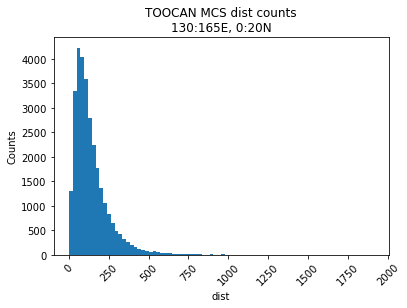

In [88]:
hist, bin_edges, _ = plt.hist(attribute_list, bins=nbins)
plt.xlabel(attribute)
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.title(f"TOOCAN MCS {attribute} counts\n{lon_min_subregion}:{lon_max_subregion}E, {lat_min_subregion}:{lat_max_subregion}N")
plt.show()
# plt.savefig(f'histograms/TOOCAN_{attribute}_hist_test.png')

# Variable mean for each binned timestep
* note: for plot of mean, the xlabel for each bar is of the upper bin edge

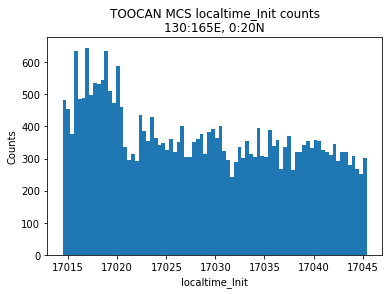

In [89]:
#-- binning times
localtime_Init_list = attr_list(toocan, "localtime_Init")
localtime_Init_hist, localtime_Init_bin_edges, localtime_Init__ = plt.hist(localtime_Init_list, bins=nbins)
plt.xlabel("localtime_Init")
plt.ylabel("Counts")
plt.title(f"TOOCAN MCS localtime_Init counts\n{lon_min_subregion}:{lon_max_subregion}E, {lat_min_subregion}:{lat_max_subregion}N")
plt.show()

In [90]:
# Extract the values of the attribute and localtime_Init from the objects
attribute_values_list = attr_list(toocan, attribute)
localtime_init_values = attr_list(toocan, 'localtime_Init')

# Convert localtime_Init bin edges to a NumPy array
localtime_init_bin_edges = np.array(localtime_Init_bin_edges)

# Digitize the localtime_Init values to determine the bin indices for each object
bin_indices = np.digitize(localtime_init_values, localtime_init_bin_edges)

# Calculate the mean of the attribute for each time period bin
mean_values = [np.mean(np.array(attribute_values_list)[bin_indices == i]) for i in range(1, len(localtime_init_bin_edges))]

if attribute == "Utime_Init" or attribute == "Utime_End":
    mean_values = [( data_reference + dt.timedelta(days=attr_time) ) for attr_time in mean_values]

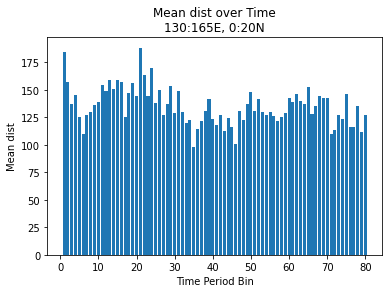

In [91]:
# Plot the mean values for each time period bin
plt.bar(range(1, len(localtime_init_bin_edges)), mean_values)
plt.xlabel('Time Period Bin')
plt.ylabel('Mean ' + attribute)
plt.title('Mean ' + attribute + f' over Time\n{lon_min_subregion}:{lon_max_subregion}E, {lat_min_subregion}:{lat_max_subregion}N')
plt.show()

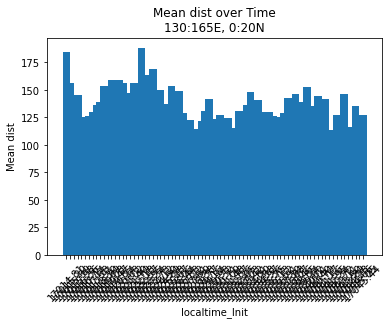

In [92]:
# Plot the mean values for each time period bin
plt.bar(localtime_init_bin_edges[1:], mean_values)
plt.xlabel('localtime_Init')
plt.ylabel('Mean ' + attribute)
plt.title('Mean ' + attribute + f' over Time\n{lon_min_subregion}:{lon_max_subregion}E, {lat_min_subregion}:{lat_max_subregion}N')

# Set the x-axis tick labels
plt.xticks(localtime_init_bin_edges[1:], rotation=45)

plt.show()

# (UNBINNED) MCS attribute over time

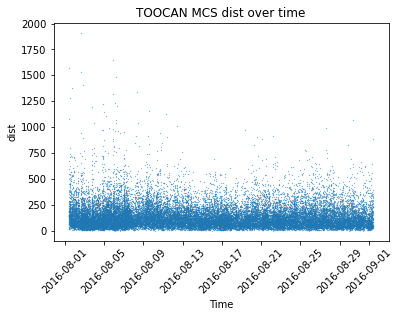

In [93]:
plt.scatter(localtime_Init_dates, attribute_list, s=0.05)
plt.xticks(rotation=45)
plt.xlabel("Time")
plt.ylabel(f"{attribute}")
plt.title(f"TOOCAN MCS {attribute} over time")
plt.show()

# (Line graphs) Variable mean for each timestep

In [94]:
# Extract the values of the attribute from the objects
attribute_values_list = attr_list(toocan, attribute)

In [95]:
# Convert the lists to NumPy arrays for easier manipulation
localtime_Init_dates = np.array(localtime_Init_dates)
attribute_values_list = np.array(attribute_values_list)

# Sort the localtime_Init_dates and attribute_values_list based on localtime_Init_dates
sort_indices = np.argsort(localtime_Init_dates)
localtime_Init_dates_ordered = localtime_Init_dates[sort_indices]
attribute_values_list_ordered = attribute_values_list[sort_indices]

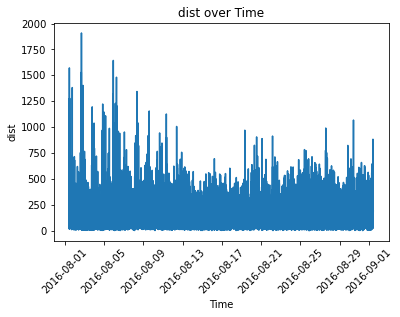

[datetime.datetime(2016, 8, 1, 10, 57, 38, 880000)
 datetime.datetime(2016, 8, 1, 10, 57, 56, 160000)
 datetime.datetime(2016, 8, 1, 10, 58, 39, 360000)
 datetime.datetime(2016, 8, 1, 10, 58, 48)
 datetime.datetime(2016, 8, 1, 11, 0, 40, 320000)
 datetime.datetime(2016, 8, 1, 11, 3, 7, 200000)
 datetime.datetime(2016, 8, 1, 11, 4, 59, 520000)
 datetime.datetime(2016, 8, 1, 11, 5, 34, 80000)
 datetime.datetime(2016, 8, 1, 11, 5, 42, 720000)
 datetime.datetime(2016, 8, 1, 11, 12, 2, 880000)] [1076.48   31.35  239.22  193.73  202.87  184.28  356.09  182.1   143.66
   96.18]


In [96]:
# Plot the  values against the unique dates
plt.plot(localtime_Init_dates_ordered, attribute_values_list_ordered)

plt.xticks(rotation=45)
# Set labels and title
plt.xlabel('Time')
plt.ylabel(attribute)
plt.title(attribute + ' over Time')

# Display the plot
plt.show()
print(localtime_Init_dates_ordered[30:40], attribute_values_list_ordered[30:40])

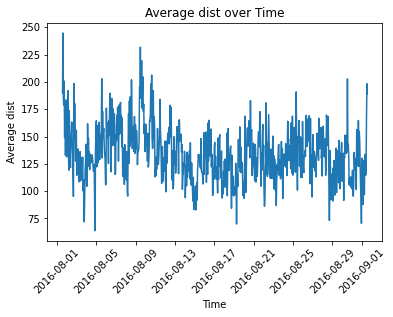

726


In [97]:
localtime_Init_dates_ordered = np.array(localtime_Init_dates_ordered)
attribute_values_list_ordered = np.array(attribute_values_list_ordered)

# convert localtime_Init_dates_ordered to timestamps in seconds
timestamps = np.array([(date - dt.datetime(1970, 1, 1)).total_seconds() for date in localtime_Init_dates_ordered])

# interval in seconds
interval_seconds = 1 * 60 * 60  # 1 hour

# average attribute values for each time interval
averaged_values = []
start_time = timestamps[0]
sum_values = 0
count = 0

end_interval_times = []

for timestamp, value in zip(timestamps, attribute_values_list_ordered):
    if timestamp - start_time <= interval_seconds:
        sum_values += value
        count += 1
    else:
        averaged_values.append(sum_values / count)
        sum_values = value
        count = 1
        start_time = timestamp
        end_interval_times.append(timestamp)

# append the average of the last interval
averaged_values.append(sum_values / count)
end_interval_times.append(timestamp)

# Plot 
# plt.plot(localtime_Init_dates_ordered[:len(averaged_values)], averaged_values)

# convert end_interval_times to datetime
end_interval_times = [dt.datetime.fromtimestamp(timestamp) for timestamp in end_interval_times]
plt.plot(end_interval_times, averaged_values)

plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Average ' + attribute)
plt.title('Average ' + attribute + ' over Time')
plt.show()
print(len(averaged_values))

# Convolution of mean variable over time (UNBINNED)

### Step 1: np.convolve

In [98]:
num_int_per_day = 24

In [99]:
#-- Defining kernel
   
# Array of length num_int_per_day full of ones then divded by num_int_per_day
# we divide by num_int_per_day to normalize
kernel = np.ones(num_int_per_day) / num_int_per_day

In [100]:
#-- Making convolution

convolved_mean_values = np.convolve(averaged_values, kernel, mode='same')

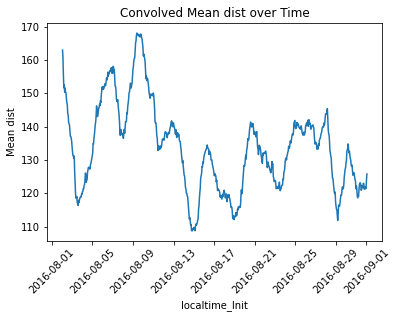

726


In [101]:
#-- Plot

# Create a figure and axes
fig, ax = plt.subplots()

plt.plot(end_interval_times[12:-12], convolved_mean_values[12:-12])

plt.xticks(rotation=45)
ax.set_xlabel('localtime_Init')
plt.ylabel('Mean ' + attribute)
plt.title('Convolved Mean ' + attribute + ' over Time')


plt.show()
print(len(convolved_mean_values))

### Step 2: Filter out diurnal cycle

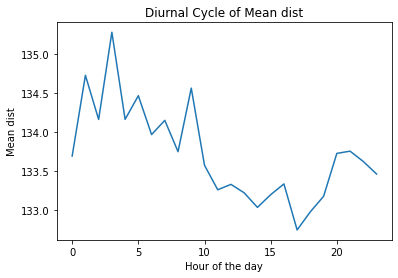

24


In [128]:
# convert datetime to hours of the day
hours = [time.hour for time in end_interval_times]

# average value for each hour of the day
diurnal_hours = range(24)  # 24 hours in a day
diurnal_cycle = []
for hour in diurnal_hours:
    # make list called values
    # if the hour in the data matches the hour in the current loop, append the data value to values list
    # find the mean for the hour in the current loop (e.g. average of all data in hour 20)
    values = [value for value, h in zip(convolved_mean_values[12:-12], hours[12:-12]) if h == hour]
    average_value = np.mean(values)
    diurnal_cycle.append(average_value)

# Plot the diurnal cycle
plt.plot(diurnal_hours, diurnal_cycle)
plt.xlabel('Hour of the day')
plt.ylabel('Mean ' + attribute)
plt.title('Diurnal Cycle of Mean ' + attribute)
plt.show()
print(len(diurnal_cycle))

# One MCS attribute over time

In [103]:
#- data spaced out in 30-minute intervals
MCS_attr = getattr(toocan[MCS_idx].clusters, attribute_single_MCS)

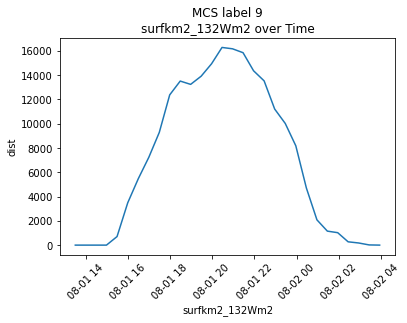

In [104]:
#-- Plot

# Create a figure and axes
fig, ax = plt.subplots()

plt.plot(Localdate_list[MCS_idx], MCS_attr)

plt.xticks(rotation=45)
ax.set_xlabel(f'{attribute_single_MCS}')
plt.ylabel(attribute)
plt.title(f"MCS label {toocan[MCS_idx].label}\n{attribute_single_MCS} over Time")


plt.show()

# 

# Plotting birth and death counts simultaneously

In [105]:
localtime_Init_dates, localtime_End_dates = [], []
Localdate_list = []

for obj in toocan:
    days_Init = obj.localtime_Init
    days_End = obj.localtime_End
    Localtime_list = obj.clusters.Localtime
    
    date_Init = data_reference + dt.timedelta(days=days_Init)
    date_End = data_reference + dt.timedelta(days=days_End)
    date_list = [( data_reference + dt.timedelta(days=ltime) ) for ltime in Localtime_list]
    
    localtime_Init_dates.append(date_Init)
    localtime_End_dates.append(date_End)
    Localdate_list.append(date_list)
    

In [106]:
Utime_Init_list = [( data_reference + dt.timedelta(days=UInit_time) ) for UInit_time in (attr_list(toocan, "Utime_Init"))]
Utime_End_list = [( data_reference + dt.timedelta(days=UEnd_time) ) for UEnd_time in (attr_list(toocan, "Utime_End"))]

In [107]:
# Utime_Init_list = [dt.datetime(1970, 1, 1) + i*dt.timedelta(hours=2) for i in (attr_list(toocan, "Utime_Init"))]

In [108]:
print((attr_list(toocan, "Utime_Init"))[200:210])
print(Utime_Init_list[200:210])

[17015.05, 17015.05, 17015.05, 17014.36, 17015.02, 17015.04, 17015.06, 17015.05, 17014.46, 17015.05]
[datetime.datetime(2016, 8, 2, 1, 12), datetime.datetime(2016, 8, 2, 1, 12), datetime.datetime(2016, 8, 2, 1, 12), datetime.datetime(2016, 8, 1, 8, 38, 24), datetime.datetime(2016, 8, 2, 0, 28, 48), datetime.datetime(2016, 8, 2, 0, 57, 36), datetime.datetime(2016, 8, 2, 1, 26, 24), datetime.datetime(2016, 8, 2, 1, 12), datetime.datetime(2016, 8, 1, 11, 2, 24), datetime.datetime(2016, 8, 2, 1, 12)]


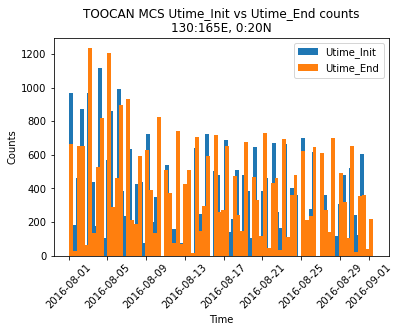

29680
371.0


In [109]:
plt.hist(Utime_Init_list, bins=nbins, label="Utime_Init")
plt.hist(Utime_End_list, bins=nbins, label="Utime_End")
plt.xlabel("Time")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.legend()
plt.title(f"TOOCAN MCS Utime_Init vs Utime_End counts\n{lon_min_subregion}:{lon_max_subregion}E, {lat_min_subregion}:{lat_max_subregion}N")
plt.show()
# plt.savefig(f'histograms/TOOCAN_{attribute}_hist_test.png')
print(len(Utime_Init_list))
print(len(Utime_Init_list) / nbins)

### as line plot

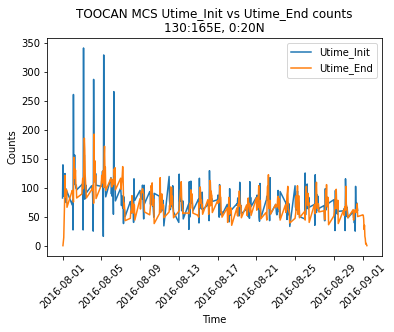

372
29680
<xarray.DataArray ()>
array(29680)


In [110]:
# convert to a pandas Series
time_series_Init = pd.Series(Utime_Init_list)
time_series_End = pd.Series(Utime_End_list)

# bin size of 1 hour
binsize = '1H'

# group the data into bins 
binned_data_series_Init = time_series_Init.groupby(time_series_Init.dt.floor(binsize)).count()
binned_data_series_End = time_series_End.groupby(time_series_End.dt.floor(binsize)).count()

# convert to an xarray DataArray
binned_data_Init = xr.DataArray(binned_data_series_Init.values, dims='time', coords={'time': binned_data_series_Init.index})
binned_data_End = xr.DataArray(binned_data_series_End.values, dims='time', coords={'time': binned_data_series_End.index})

# line plot
plt.plot(binned_data_Init.coords['time'], binned_data_Init, label="Utime_Init")
plt.plot(binned_data_End.coords['time'], binned_data_End, label="Utime_End")

plt.xlabel("Time")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.legend()
plt.title(f"TOOCAN MCS Utime_Init vs Utime_End counts\n{lon_min_subregion}:{lon_max_subregion}E, {lat_min_subregion}:{lat_max_subregion}N")

# Display the plot
plt.show()
print(len(binned_data_Init))
print(len(Utime_Init_list))
print(sum(binned_data_Init))

### convolve for births and deaths

In [111]:
num_int_per_day = 24
kernel = np.ones(num_int_per_day) / num_int_per_day

In [112]:
convolved_Init = np.convolve(binned_data_Init, kernel, mode='same')
convolved_End = np.convolve(binned_data_End, kernel, mode='same')

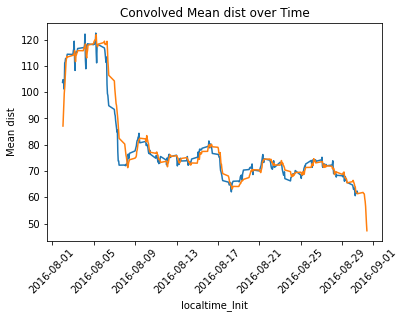

In [113]:
# Create a figure and axes
fig, ax = plt.subplots()

plt.plot((binned_data_Init.coords['time'])[12:-12], convolved_Init[12:-12], label="Utime_Init")
plt.plot((binned_data_End.coords['time'])[12:-12], convolved_End[12:-12], label="Utime_End")

plt.xticks(rotation=45)
ax.set_xlabel('localtime_Init')
plt.ylabel('Mean ' + attribute)
plt.title('Convolved Mean ' + attribute + ' over Time')


plt.show()

### diurnal cycle for births and deaths

<xarray.DataArray 'time' (time: 372)>
array(['2016-08-01T00:00:00.000000000', '2016-08-01T01:00:00.000000000',
       '2016-08-01T02:00:00.000000000', ..., '2016-08-31T09:00:00.000000000',
       '2016-08-31T10:00:00.000000000', '2016-08-31T11:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2016-08-01 ... 2016-08-31T11:00:00


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


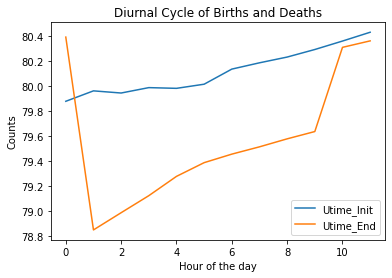

In [114]:
import datetime
# convert to datetime objects
def convert_datetime64_to_datetime(dt64):
    dt = np.datetime_as_string(dt64, unit='s')
    return datetime.datetime.strptime(dt, '%Y-%m-%dT%H:%M:%S')

# convert to hours of the day
hours_Init = [convert_datetime64_to_datetime(dt).hour for dt in binned_data_Init.time.data[12:-12]]
hours_End = [convert_datetime64_to_datetime(dt).hour for dt in binned_data_End.time.data[12:-12]]

print((binned_data_Init.coords['time']))
# average value for each hour of the day
diurnal_hours = range(24)  # 24 hours in a day
diurnal_cycle_Init = []
diurnal_cycle_End = []
for hour in diurnal_hours:
    # make list called values
    # if the hour in the data matches the hour in the current loop, append the data value to values list
    # find the mean for the hour in the current loop (e.g. average of all data in hour 20)
    values_Init = [value_Init for value_Init, h_Init in zip(convolved_Init, hours_Init) if h_Init == hour]
    values_End = [value_End for value_End, h_End in zip(convolved_End, hours_End) if h_End == hour]
    
    average_Init = np.mean(values_Init)
    average_End = np.mean(values_End)
    
    diurnal_cycle_Init.append(average_Init)
    diurnal_cycle_End.append(average_End)

# plot
plt.plot(diurnal_hours, diurnal_cycle_Init, label="Utime_Init")
plt.plot(diurnal_hours, diurnal_cycle_End, label="Utime_End")
plt.xlabel('Hour of the day')
plt.ylabel("Counts")
plt.title("Diurnal Cycle of Births and Deaths")
plt.legend()
plt.show()

### diurnal cycle using np.reshapeprint(diurnal_data.shape)
* this currently ignores the first and last 12 hours of each day to prevent boundary effects
* then, it ignores another 12 hours for Init and 21 hours for End to fit reshaping data


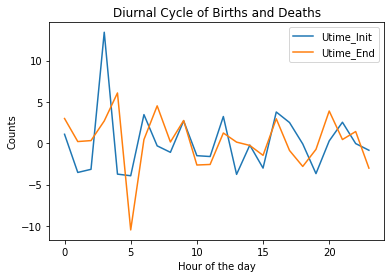

In [115]:
diurnal_hours = range(24)  # 24 hours in a day
for i in range(2):
    if i == 0:
        binned_data = binned_data_Init
        convolved_data = convolved_Init
        label = "Utime_Init"
        
        # data is original-convolved data
        diurnal_data = (binned_data - convolved_data).values[12:-(12+12)]
    else:
        binned_data = binned_data_End
        convolved_data = convolved_End
        label = "Utime_End"
        # data is original-convolved data
        diurnal_data = (binned_data - convolved_data).values[12:-(12+21)]
    

    # axes for reshaping. ndays calculated based on the length of data
    ndays = diurnal_data.shape[0] // 24
    nhours = 24

    diurnal_cycle = np.mean(np.reshape(diurnal_data, (nhours, ndays)), axis=1)

    # plot
    plt.plot(diurnal_hours, diurnal_cycle, label=label)
plt.xlabel('Hour of the day')
plt.ylabel("Counts")
plt.title("Diurnal Cycle of Births and Deaths")
plt.legend()
plt.show()

# Evolution of MCS linked to extreme precipitation
1. Select MCS tied to extreme precip.
2. Trace birth of MCS
3. Plot time series of MCS variable

### single timestep

In [116]:
prec = loadPrec(prec_idx,df)
# Replace negative values with NaN
prec = xr.where(prec < 0, np.nan, prec)

In [117]:
prec.max()

<xarray.DataArray 'Precac' ()>
array(49.83415604)

In [118]:
threshold = np.nanpercentile(prec, percentile)

In [119]:
extreme_values = xr.where(prec >= threshold, prec, np.nan)
extreme_values_lon = extreme_values.lon.values
extreme_values_lat = extreme_values.lat.values

# convert to numpy array
extreme_values_np = extreme_values.values

# get non-NaN values and their coordinates
non_nan_values = extreme_values_np[~np.isnan(extreme_values_np)]
non_nan_indices = np.argwhere(~np.isnan(extreme_values_np))


ex_val_list, ex_lon_list, ex_lat_list = [], [], []

for index in non_nan_indices:
    value = extreme_values_np[tuple(index)]
    lon = extreme_values_lon[index[1]]
    lat = extreme_values_lat[index[0]]
    print(f"Value: {value}, Lon: {lon}, Lat: {lat}")
    ex_val_list.append(value)
    ex_lon_list.append(lon)
    ex_lat_list.append(lat)
combined_ex_list = list(zip(ex_lat_list, ex_lon_list))
print(combined_ex_list)

Value: 42.51411056518555, Lon: 157.83201599121094, Lat: 14.080078125
Value: 44.30144500732422, Lon: 157.83201599121094, Lat: 14.118706703186035
Value: 46.47736358642578, Lon: 158.18357849121094, Lat: 14.15733528137207
Value: 47.186607360839844, Lon: 158.22264099121094, Lat: 14.15733528137207
Value: 49.83415603637695, Lon: 157.83201599121094, Lat: 14.23459243774414
[(14.080078, 157.83202), (14.118707, 157.83202), (14.157335, 158.18358), (14.157335, 158.22264), (14.234592, 157.83202)]


In [120]:
# load MCS labels for this timestep
root_toocan = df.iloc[prec_idx]['img_seg_path']
corresponding_toocan = xr.open_dataarray(os.path.join("/",root_toocan), engine='netcdf4').load()[0]
combined_corr_toocan_coords = list(zip(corresponding_toocan.latitude, corresponding_toocan.longitude))

/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [121]:
label_list, MCS_index_list = [], []
for lat_0, lon_0 in combined_ex_list:
    i_0 = (np.where(corresponding_toocan.latitude > lat_0))[0][0]
    j_0 = (np.where(corresponding_toocan.longitude > lon_0))[0][0]
    
    label = corresponding_toocan[i_0, j_0]
    label_list.append(label)
    MCS_index_list.append(label - 1)

In [122]:
print(MCS_index_list[0])

<xarray.DataArray 'MCS_label' ()>
array(208.)
Coordinates:
    latitude   float32 14.12
    longitude  float32 157.9
    time       datetime64[ns] 2016-08-01T03:30:00


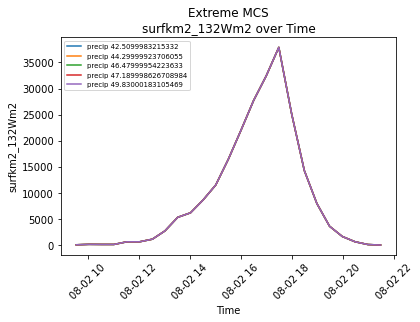

In [123]:
fig, ax = plt.subplots()
for MCS in range(len(MCS_index_list)):
    MCS_ex = MCS_index_list[MCS]
    MCS_ex_idx = int(MCS_ex.item())
    MCS_attr_ex = getattr(toocan[MCS_ex_idx].clusters, attribute_single_MCS)


    plt.plot(Localdate_list[MCS_ex_idx], MCS_attr_ex, label=f"precip {round(ex_val_list[MCS],2)}")

plt.xticks(rotation=45)
ax.set_xlabel("Time")
plt.ylabel(f'{attribute_single_MCS}')
plt.title(f"Extreme MCS\n{attribute_single_MCS} over Time")
plt.legend(fontsize='x-small')

plt.show()

### multiple timesteps
* ignores the first timestep

In [124]:
fixed_threshold = 80
TESTING = True

if TESTING == True:
    df_len = 50
else:
    df_len = len(df)

In [125]:
multiple_MCS_index_list = []
multiple_ex_val_list = []

for df_i in range(df_len):
    if not df_i == 0:
        print(df_i)
        prec_i = loadPrec(df_i,df)
        # Replace negative values with NaN
        prec_i = xr.where(prec_i < 0, np.nan, prec_i)
        
        extreme_values_i = xr.where(prec_i >= fixed_threshold, prec_i, np.nan)
        extreme_values_lon_i = extreme_values_i.lon.values
        extreme_values_lat_i = extreme_values_i.lat.values

        # convert to numpy array
        extreme_values_np_i = extreme_values_i.values

        # get non-NaN values and their coordinates
        non_nan_values_i = extreme_values_np_i[~np.isnan(extreme_values_np_i)]
        non_nan_indices_i = np.argwhere(~np.isnan(extreme_values_np_i))


        ex_val_list_i, ex_lon_list_i, ex_lat_list_i = [], [], []

        for index_i in non_nan_indices_i:
            value_i = extreme_values_np_i[tuple(index_i)]
            lon_i = extreme_values_lon_i[index_i[1]]
            lat_i = extreme_values_lat_i[index_i[0]]
#             print(f"Value: {value_i}, Lon: {lon_i}, Lat: {lat_i}")
            ex_val_list_i.append(value_i)
            ex_lon_list_i.append(lon_i)
            ex_lat_list_i.append(lat_i)
        multiple_ex_val_list.append(ex_val_list_i)
        combined_ex_list_i = list(zip(ex_lat_list_i, ex_lon_list_i))
        
        
        
        # load MCS labels for this timestep
        root_toocan_i = df.iloc[df_i]['img_seg_path']
        corresponding_toocan_i = xr.open_dataarray(os.path.join("/",root_toocan_i), engine='netcdf4').load()[0]
        combined_corr_toocan_coords_i = list(zip(corresponding_toocan_i.latitude, corresponding_toocan_i.longitude))
        
        
        # Get corresponding MCS label
        label_list_i, MCS_index_list_i = [], []
        for lat_0_i, lon_0_i in combined_ex_list_i:
            i_0_i = (np.where(corresponding_toocan_i.latitude > lat_0_i))[0][0]
            j_0_i = (np.where(corresponding_toocan_i.longitude > lon_0_i))[0][0]

            label_i = corresponding_toocan_i[i_0_i, j_0_i]
            label_list_i.append(label_i)
            MCS_index_list_i.append(label_i - 1)
        multiple_MCS_index_list.append(MCS_index_list_i)

1


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


2


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


3


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


4


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


5


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


6


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


7


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


8


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


9


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


10


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


11


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


12


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


13


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


14


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


15


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


16


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


17


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


18


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


19


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


20


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


21


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


22


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


23


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


24


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


25


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


26


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


27


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


28


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


29


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


30


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


31


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


32


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


33


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


34


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


35


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


36


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


37


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


38


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


39


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


40


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


41


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


42


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


43


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


44


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


45


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


46


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


47


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


48


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


49


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


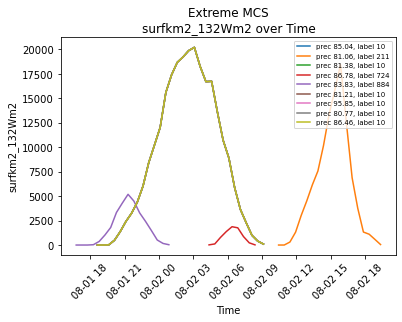

In [126]:
from decimal import Decimal, ROUND_HALF_UP
fig, ax = plt.subplots()
plotted_indices = set()  # Set to store already plotted MCS_ex_idx values


for idx, mcs_idx_list in enumerate(multiple_MCS_index_list):
    if mcs_idx_list: # if list is not empty
        
        for MCS in range(len(mcs_idx_list)):
            MCS_ex = mcs_idx_list[MCS]
            if not math.isnan(MCS_ex.item()):
                MCS_ex_idx = int(MCS_ex.item())
                
#                 if MCS_ex_idx not in plotted_indices:  # Check if MCS_ex_idx has already been plotted
                    
                MCS_attr_ex = getattr(toocan[MCS_ex_idx].clusters, attribute_single_MCS)

                num = Decimal(f"{multiple_ex_val_list[idx][MCS]}")
                rounded_num = num.quantize(Decimal('0.01'), rounding=ROUND_HALF_UP)
                plt.plot(Localdate_list[MCS_ex_idx], MCS_attr_ex, label=f"prec {rounded_num}, label {MCS_ex_idx+1}") # , label=f"precip {round(ex_val_list_i[MCS],2)}"
                plotted_indices.add(MCS_ex_idx)  # Add MCS_ex_idx to plotted indices
                    
plt.xticks(rotation=45)
ax.set_xlabel("Time")
plt.ylabel(f'{attribute_single_MCS}')
plt.title(f"Extreme MCS\n{attribute_single_MCS} over Time")
plt.legend(fontsize='x-small')

plt.show()